# Importing necessary libraries


In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [225]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [291]:
# Loading the data and converting it to data frame 
df = pd.read_csv('/content/drive/MyDrive/Kaggle Dataset/Project 2/hospital_readmissions.csv')
df.head(5)


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## Exploratory Data Analysis (EDA)

In [227]:
df.info()
# Checking if there is any null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [228]:
df.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [229]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,25000.0,4.45332,3.001470,1.0,2.0,4.0,6.0,14.0
n_lab_procedures,25000.0,43.24076,19.818620,1.0,31.0,44.0,57.0,113.0
n_procedures,25000.0,1.35236,1.715179,0.0,0.0,1.0,2.0,6.0
n_medications,25000.0,16.25240,8.060532,1.0,11.0,15.0,20.0,79.0
n_outpatient,25000.0,0.36640,1.195478,0.0,0.0,0.0,0.0,33.0
n_inpatient,25000.0,0.61596,1.177951,0.0,0.0,0.0,1.0,15.0
n_emergency,25000.0,0.18660,0.885873,0.0,0.0,0.0,0.0,64.0


# Histograms showing categorical data

In [230]:
# List of categorical variable
categorical_variable = ['medical_specialty', 'age', 'diag_1','diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med' ]

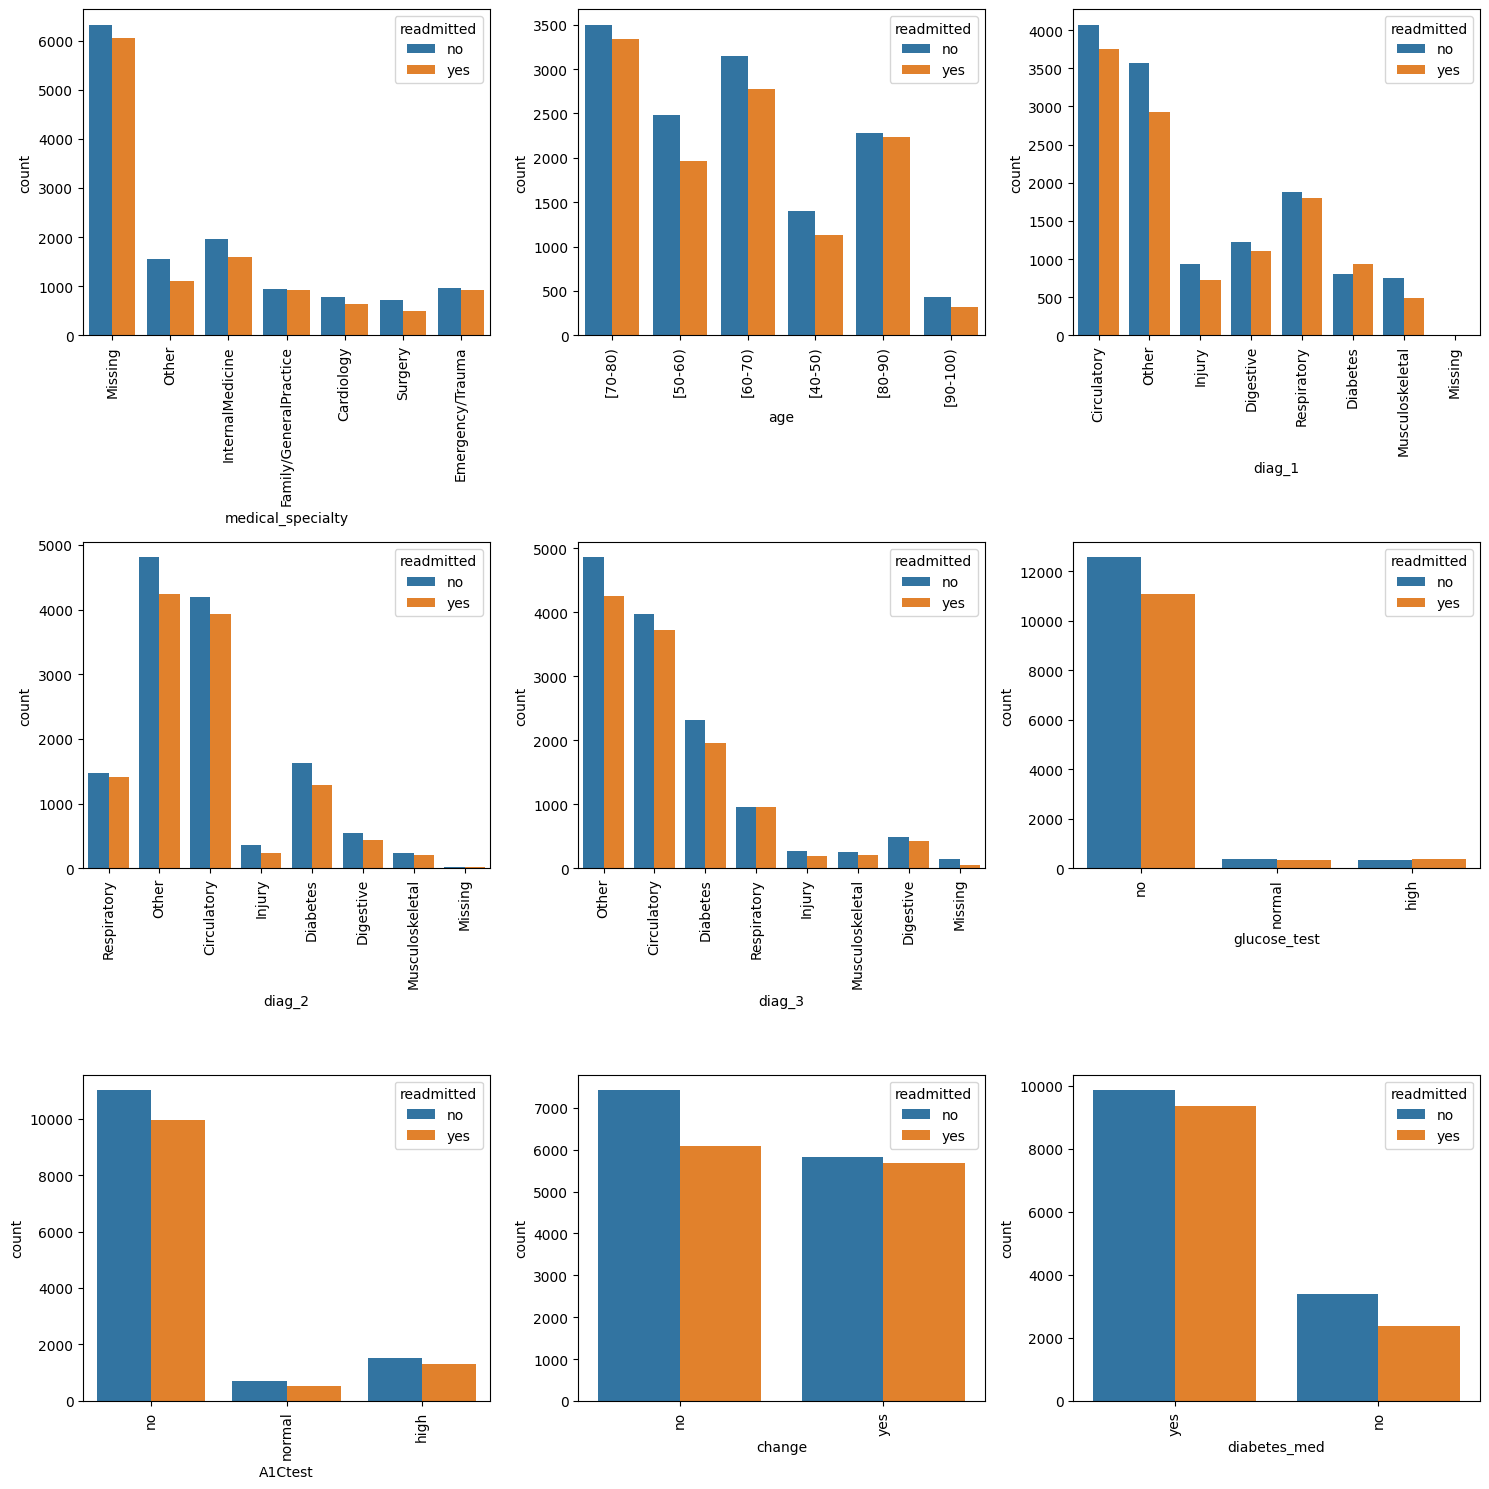

In [231]:
# Plotting categorical varibales against "Readmitted" variable
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate(categorical_variable):
  sns.countplot(x = var, hue = 'readmitted', data = df, ax = axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
fig.tight_layout()
plt.show()



# Box plot showing numerical data

In [232]:
# List of numerical variables 
num_vars = ['time_in_hospital', 'n_lab_procedures', 'n_medications', 'n_outpatient','n_inpatient', 'n_emergency']

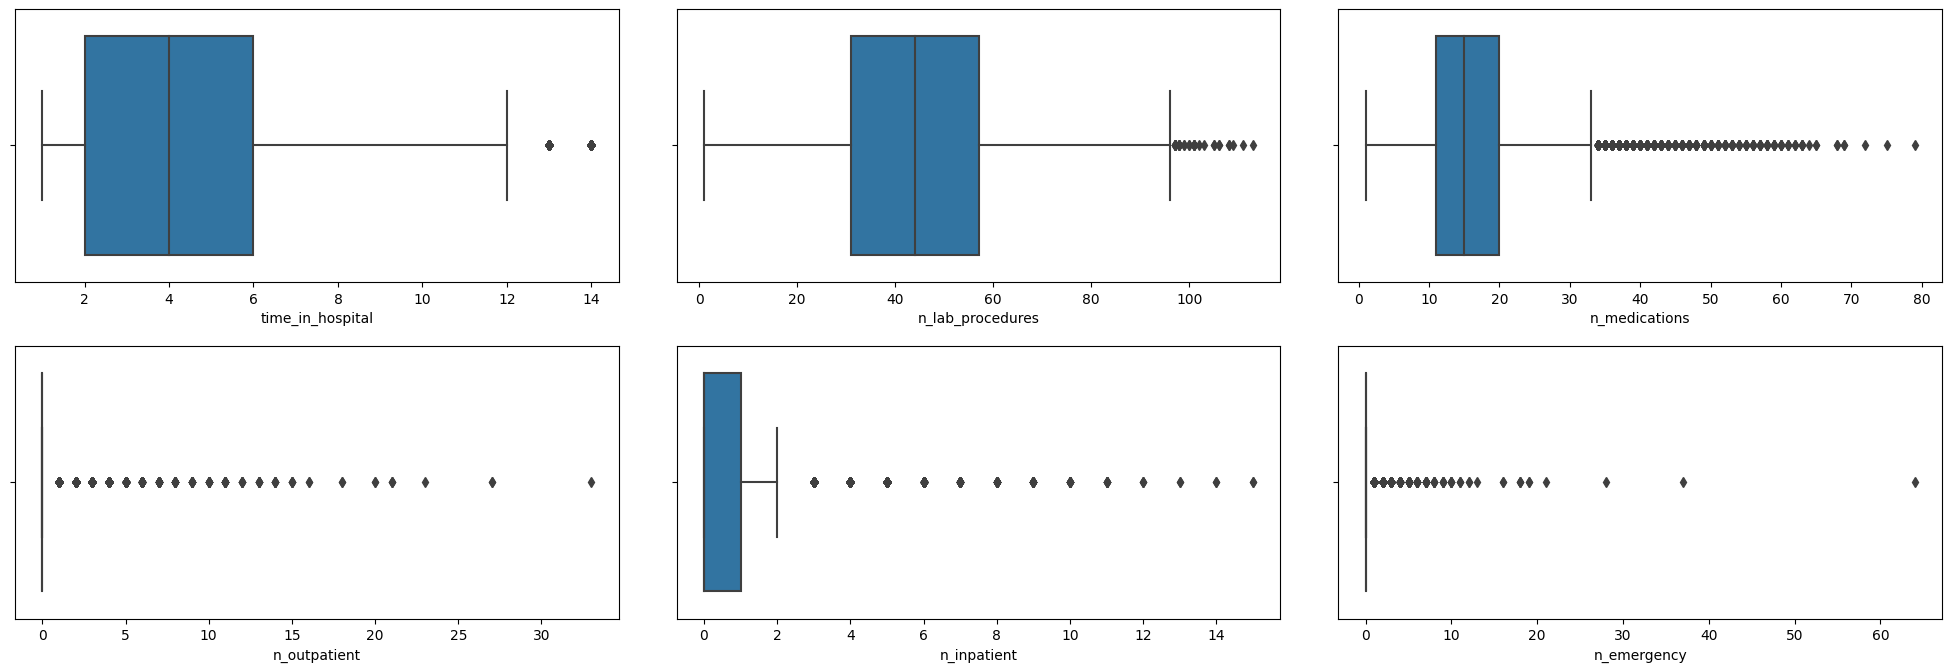

In [233]:
# Box plots reflecting numerical variables (outlier - analysis)

fig, axs  = plt.subplots(nrows=3, ncols=3, figsize = (20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
fig.delaxes(axs[6])

fig.delaxes(axs[8]) 
fig.delaxes(axs[7]) 
plt.show()

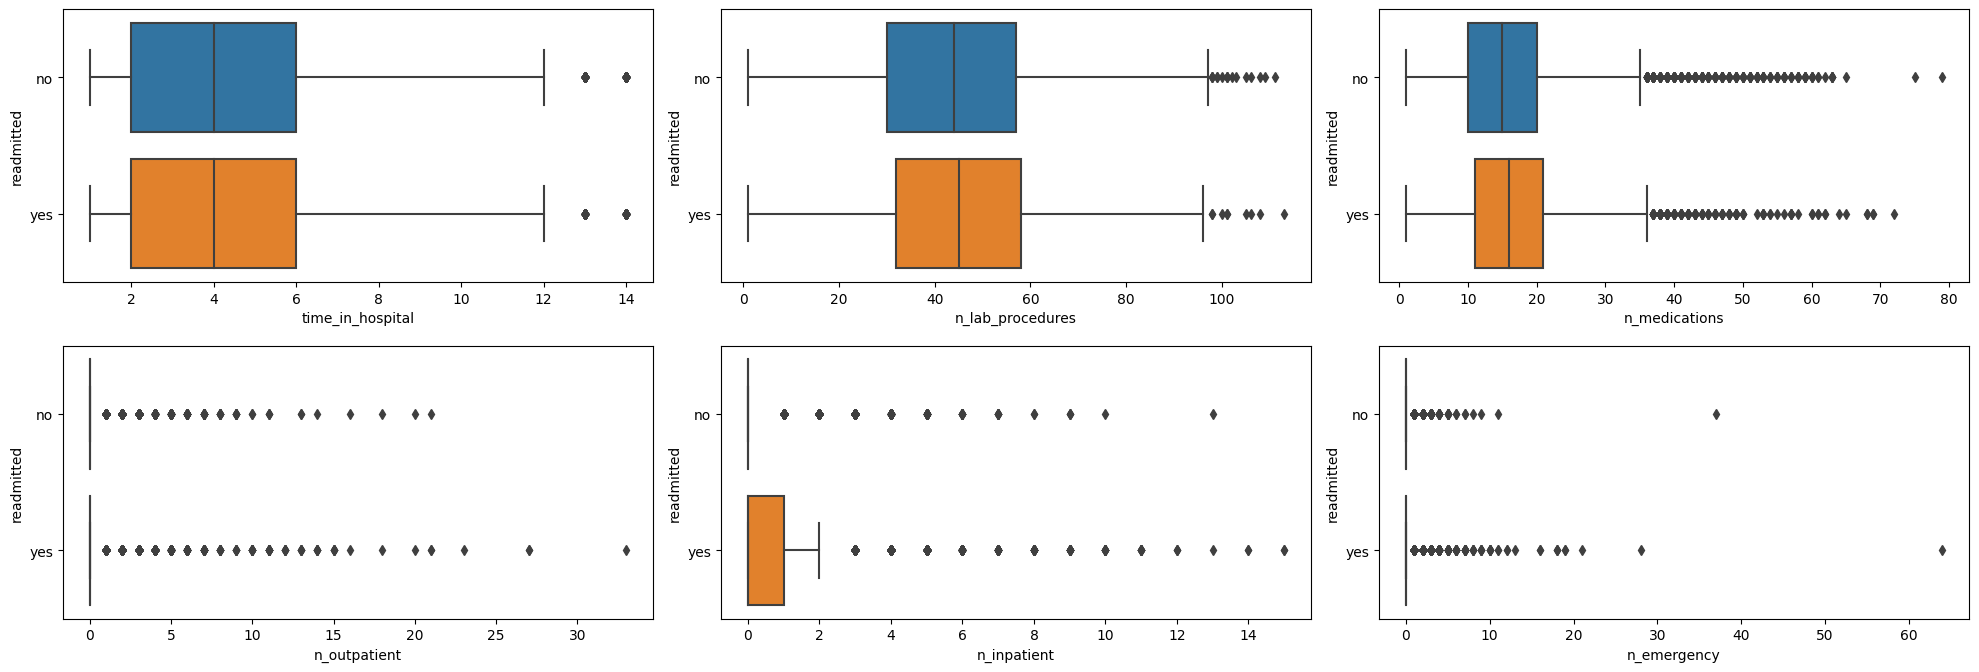

In [234]:
fig, axs  = plt.subplots(nrows=3, ncols=3, figsize = (20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.boxplot(x=var, data=df,y = 'readmitted', ax=axs[i])

fig.tight_layout()
fig.delaxes(axs[6])

fig.delaxes(axs[8]) 
fig.delaxes(axs[7]) 
plt.show()

## Code to check the duplicate values

In [235]:
n_duplicate = df.duplicated().sum()
print("Number of Duplicate values in the data frame are : ", n_duplicate)
# There are no duplicate values in the dataset

Number of Duplicate values in the data frame are :  0


# Scatter plot between dependent and independent variable

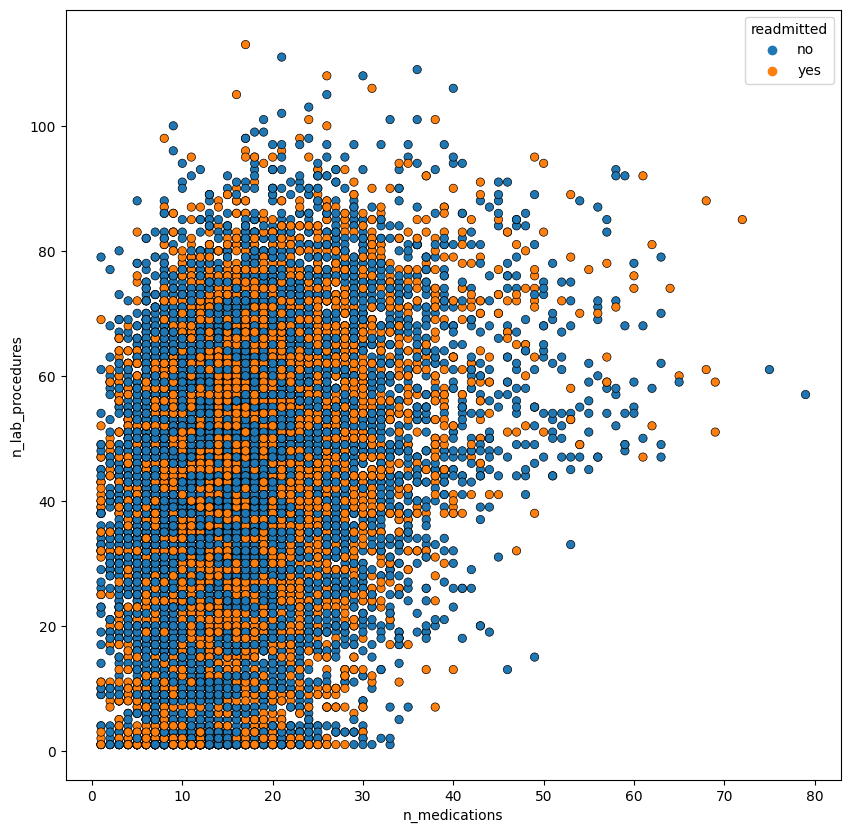

In [236]:
plt.figure(figsize=(10,10), dpi=100)
sns.scatterplot(x = 'n_medications', y = 'n_lab_procedures', hue = 'readmitted', data =df, edgecolor = 'black')
plt.show()

In [237]:
# checking number of datapoints 
df.shape

(25000, 17)

# Correlation plot 

<ipython-input-238-0b3321049b1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


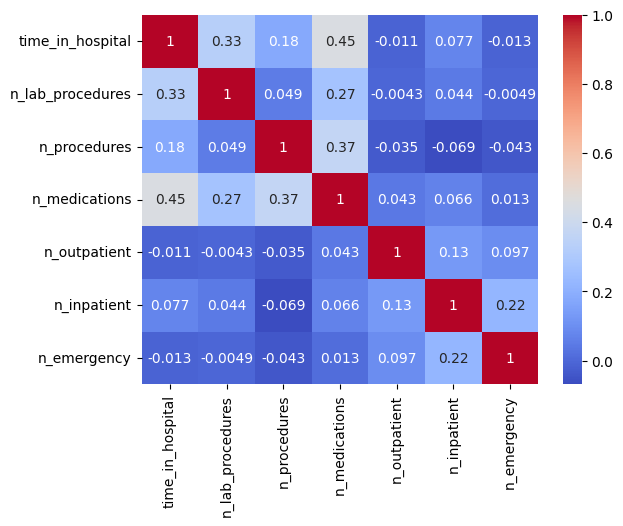

In [238]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')
plt.show()

# Label Encoding of the data

In [239]:
# Checking differnet unique values in differet categorical variable
for i in df.select_dtypes(include=['object']).columns:
  print(i," : " , df[i].unique())

age  :  ['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']
medical_specialty  :  ['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']
diag_1  :  ['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
diag_2  :  ['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
diag_3  :  ['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']
glucose_test  :  ['no' 'normal' 'high']
A1Ctest  :  ['no' 'normal' 'high']
change  :  ['no' 'yes']
diabetes_med  :  ['yes' 'no']
readmitted  :  ['no' 'yes']


In [240]:
for col in df.select_dtypes(include=['object']).columns:

  label_encoder = LabelEncoder()
  label_encoder.fit(df[col].unique())
  df[col] = label_encoder.transform(df[col])

  print(col, " : ", df[col].unique())

age  :  [3 1 2 0 4 5]
medical_specialty  :  [4 5 3 2 0 6 1]
diag_1  :  [0 6 3 2 7 1 5 4]
diag_2  :  [7 6 0 3 1 2 5 4]
diag_3  :  [6 0 1 7 3 5 2 4]
glucose_test  :  [1 2 0]
A1Ctest  :  [1 2 0]
change  :  [0 1]
diabetes_med  :  [1 0]
readmitted  :  [0 1]


## Outier Removal

In [241]:
# I am defining a function here to remove outliers

def remove_outliers(df, columns):
  for i in columns:
    q1 = df[i].quantile(0.25)
    q2 = df[i].quantile(0.75)
    iqr = q2-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q2 + 1.5 * iqr
    df = df[(df[i]>= lower_bound) & (df[i] <= upper_bound)] 
  return df

# Columns to remove outliers from selected columns
columns_to_check = ['n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

# Calling the function to clean the data and remove outliers
df_clean = remove_outliers(df, columns_to_check)

# Printing first 5 rows of the cleaned data 
df_clean.head(5)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0
5,0,2,51,0,10,0,0,0,4,6,6,6,1,1,0,0,1
6,1,4,44,2,21,0,0,0,4,3,6,6,1,2,1,1,0


In [242]:
# Updated shape of the cleaned data
df_clean.shape

(17629, 17)

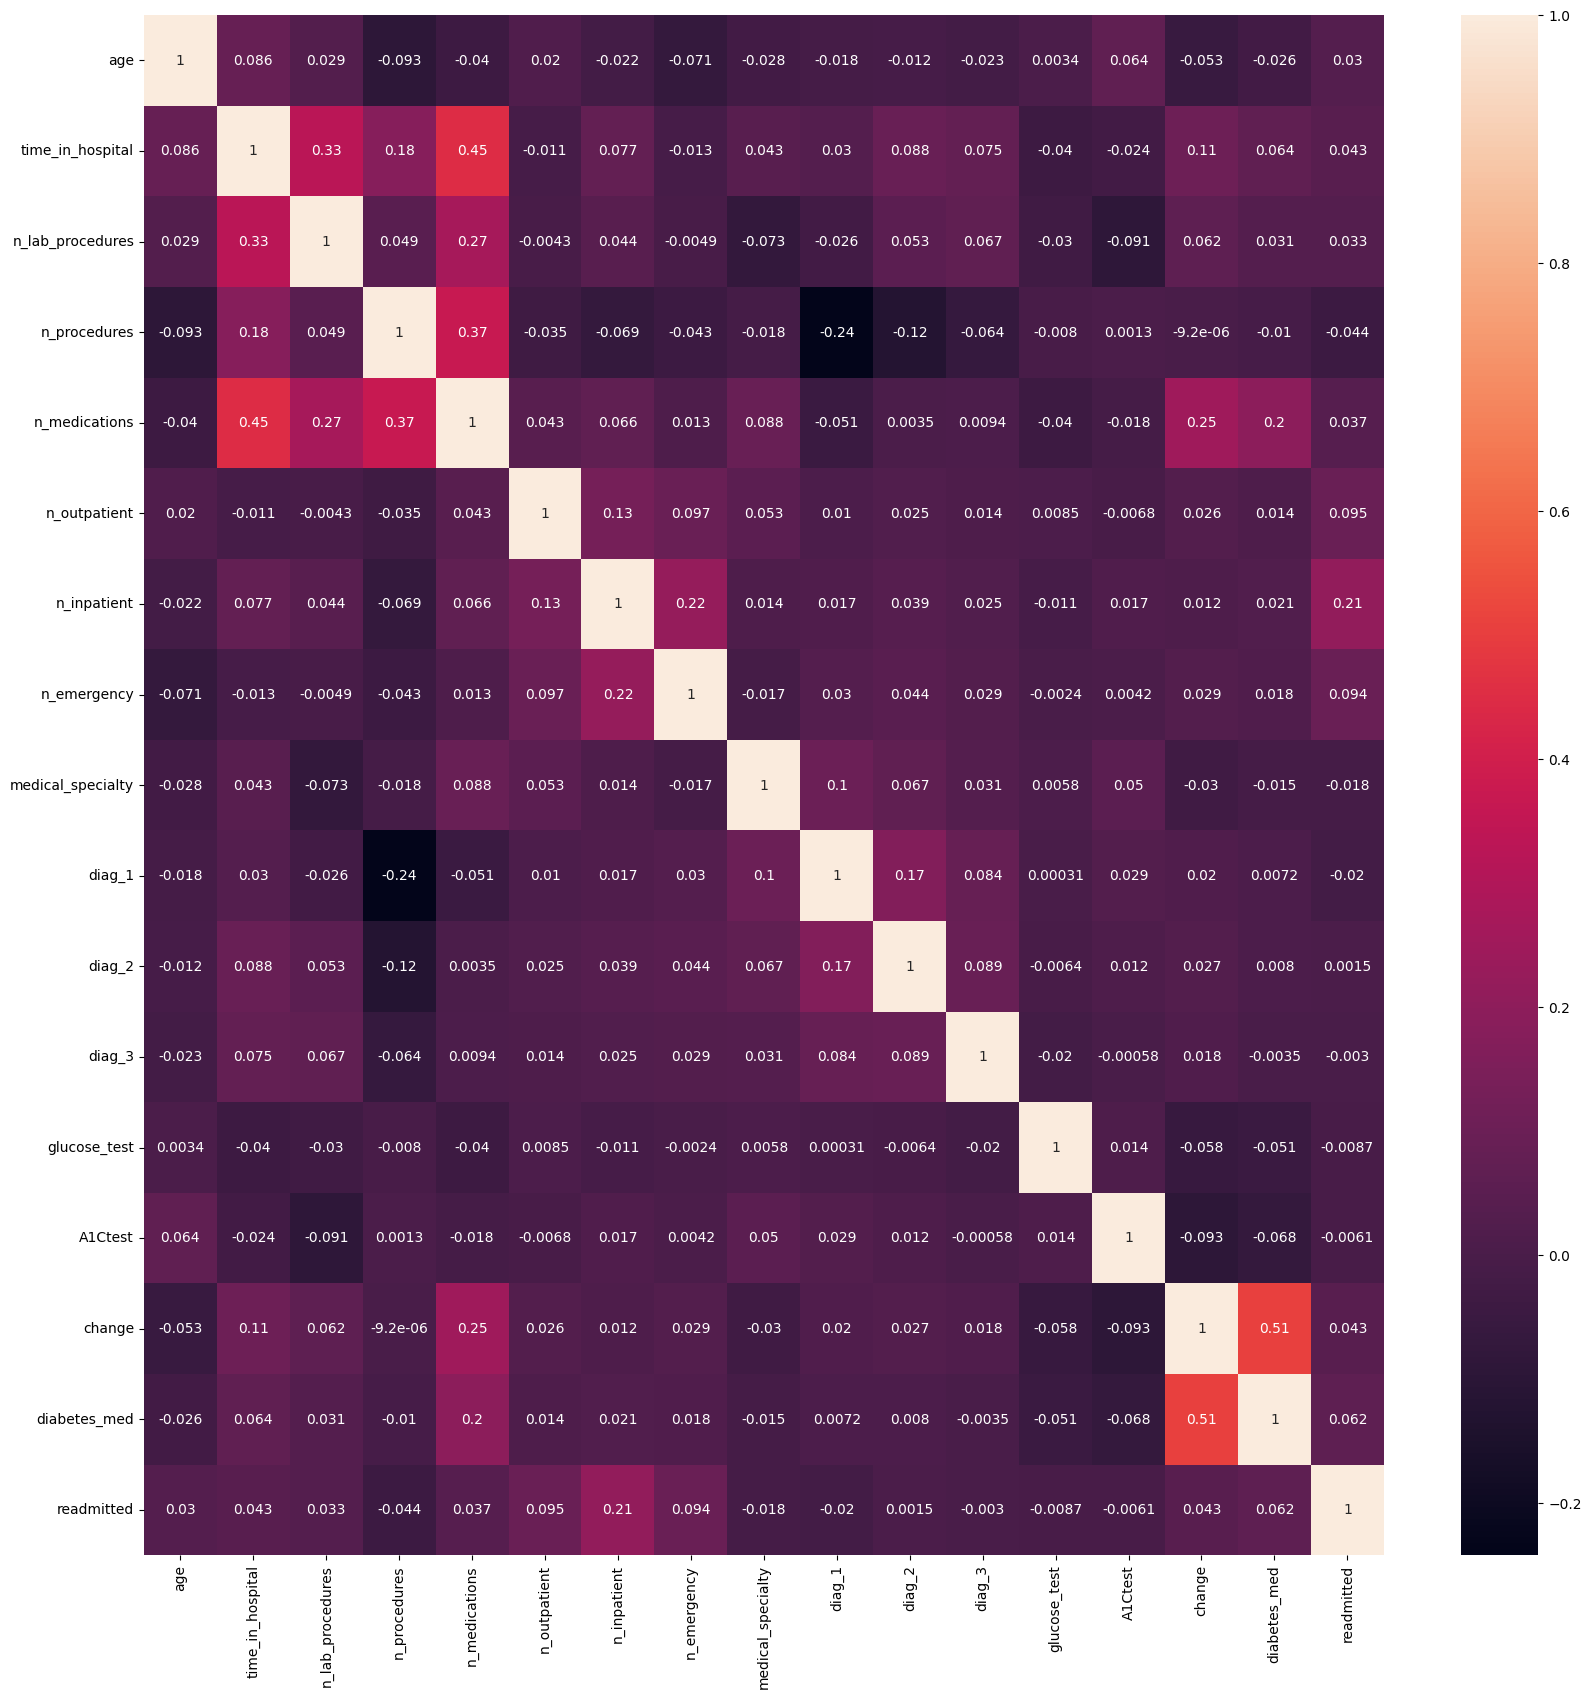

In [243]:
plt.figure(figsize=(20,20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [244]:
# All of the data types are of integer type 
df_clean.dtypes

age                  int64
time_in_hospital     int64
n_lab_procedures     int64
n_procedures         int64
n_medications        int64
n_outpatient         int64
n_inpatient          int64
n_emergency          int64
medical_specialty    int64
diag_1               int64
diag_2               int64
diag_3               int64
glucose_test         int64
A1Ctest              int64
change               int64
diabetes_med         int64
readmitted           int64
dtype: object

In [245]:
# Assigning data points to X and y variables

y = df_clean['readmitted']
X = df_clean.drop('readmitted', axis = 1)

In [246]:
# Dividing the data to training and testing sets

X_train, X_test, y_train, y_test  =  train_test_split(X,y, test_size = 0.20, random_state =42)

In [247]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14103, 16)
(14103,)
(3526, 16)
(3526,)


# Standardization 

In [248]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [249]:
df_clean.drop(columns = ['n_outpatient','n_emergency'], inplace =True)
df_clean.shape

(17629, 15)

# Models 

## Model 1.  Logistic Regression

In [250]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)
y_pred_LR = LR.predict(X_test_scaled)
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Accuracy score for Logistic Regression : ",accuracy_LR)

Accuracy score for Logistic Regression :  0.605218377765173


## Model 2. Decision Tree

In [251]:
DT  = DecisionTreeClassifier(class_weight = 'balanced')
param_grid = {
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_leaf' : [1,2,3,4],
    'min_samples_split' : [2,3,4],
    'random_state' : [0,42]
   
   
}

grid_search = GridSearchCV(DT, param_grid, cv = 5)
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [269]:
DTree = DecisionTreeClassifier(random_state = 0, max_depth =7, min_samples_leaf = 1, min_samples_split=2 )
DTree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7, random_state=0)

In [270]:
y_pred_DT = DTree.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print("Accuracy of the Decision Tree is : ", accuracy_DT)

Accuracy of the Decision Tree is :  0.6074872376630743


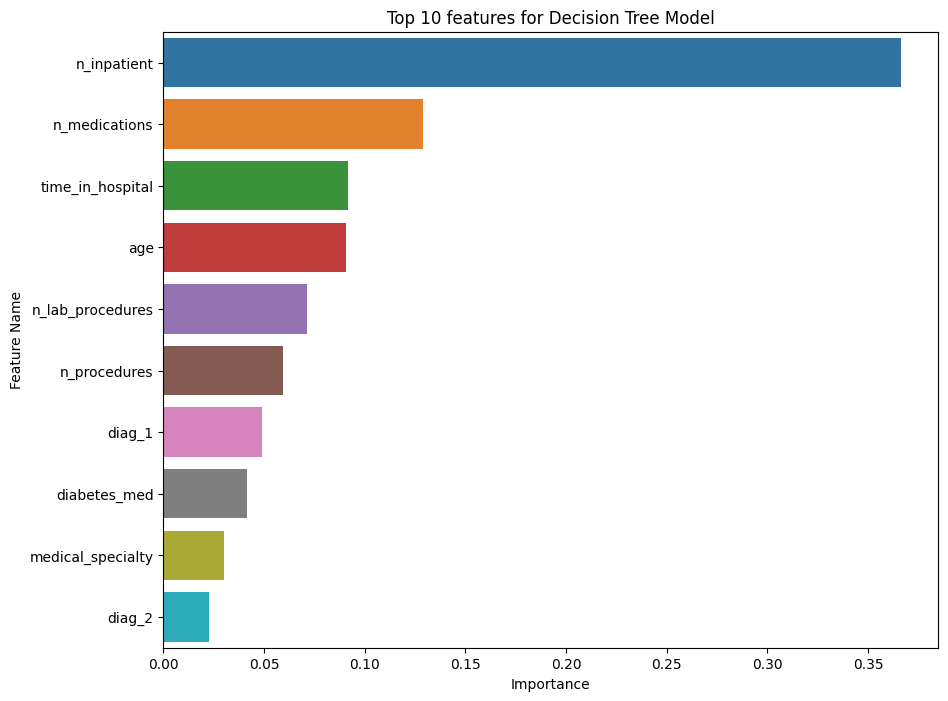

In [277]:
imp_features = pd.DataFrame({
    'Feature_Name' : X_train.columns,
    'Importance' : DTree.feature_importances_
})

f1 = imp_features.sort_values(by='Importance', ascending = False)
f12 = f1.head(10)
plt.figure(figsize = (10,8))
sns.barplot(data=f12, x = 'Importance', y='Feature_Name')
plt.title('Top 10 features for Decision Tree Model')
plt.xlabel("Importance")
plt.ylabel('Feature Name')
plt.show()


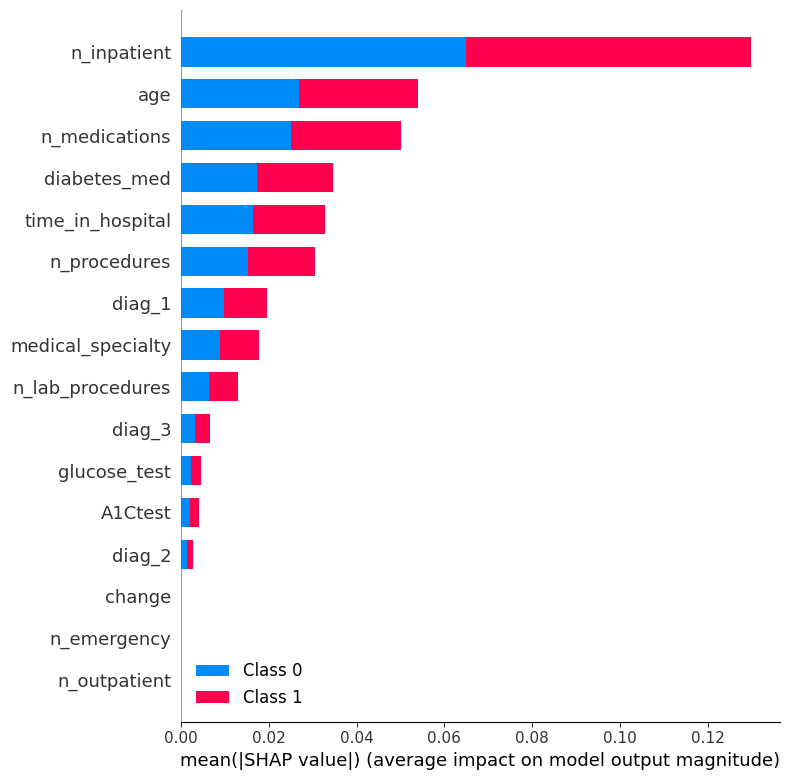

In [272]:
import shap
explainer = shap.TreeExplainer(DTree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

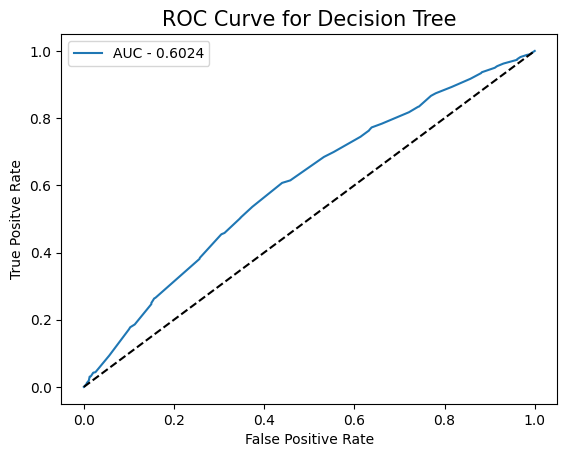

In [289]:
# ROC Curve and AUC Curve for decision tree
y_pred_proba = DTree.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns = ['y_pred_proba'])], axis=1)  
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label = 'AUC - %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('ROC Curve for Decision Tree', size=15)
plt.legend()

## Model 3. Random Forest 

In [273]:
RF = RandomForestClassifier(random_state=0, n_estimators=200, max_depth =7)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=0)

In [274]:
y_pred_RF = RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy Score of Random Forest is : ", accuracy_RF)

Accuracy Score of Random Forest is :  0.6080544526375496


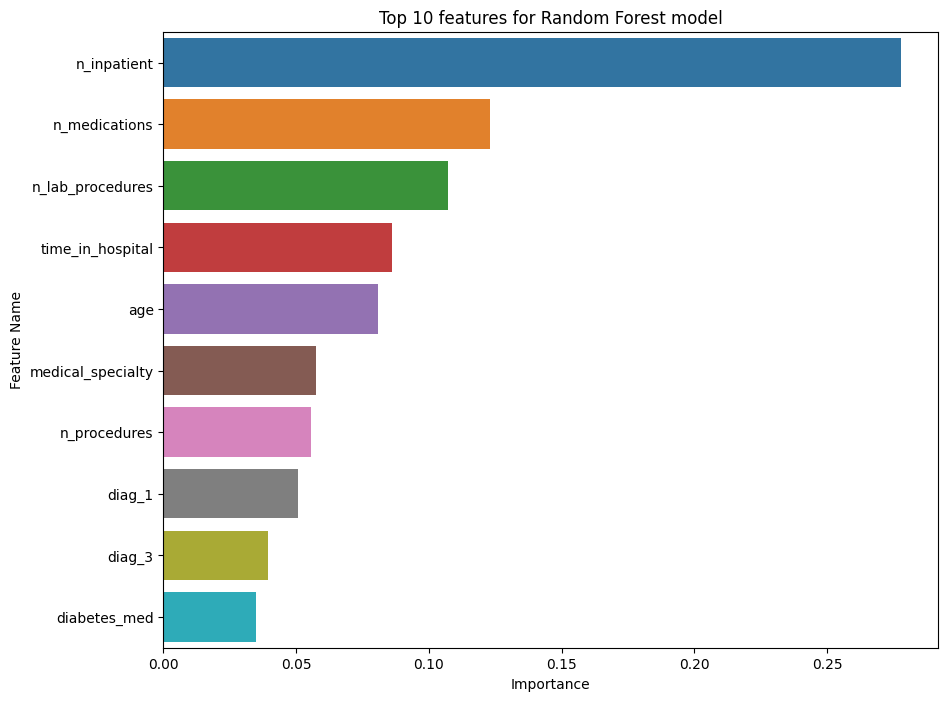

In [276]:
imp_features = pd.DataFrame({
    'Feature_Name' : X_train.columns,
    'Importance' : RF.feature_importances_
})

f1 = imp_features.sort_values(by='Importance', ascending = False)
f12 = f1.head(10)
plt.figure(figsize = (10,8))
sns.barplot(data=f12, x = 'Importance', y='Feature_Name')
plt.title('Top 10 features for Random Forest model')
plt.xlabel("Importance")
plt.ylabel('Feature Name')
plt.show()


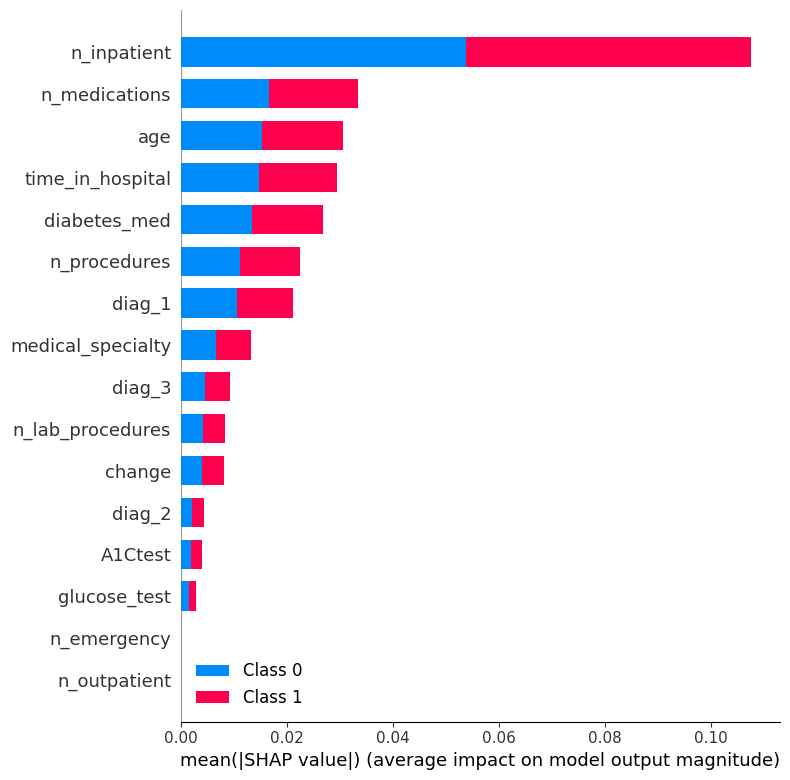

In [279]:

explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

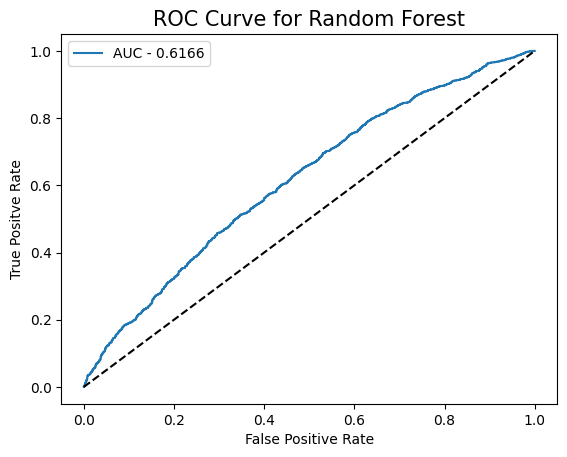

In [288]:
y_pred_proba = RF.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns = ['y_pred_proba'])], axis=1)  
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label = 'AUC - %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('ROC Curve for Random Forest', size=15)
plt.legend()